In [1]:
# Can we taste with our eyes?
# Qingwei Zhang, Christopher Song, Karen Chen
# basic script to convert original mask to binary mask

import numpy as np
np.set_printoptions(threshold=np.inf)
import nibabel as nib
from nibabel.testing import data_path
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Chris Song\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load old mask image
m_fname = 'amygdala-mni-sym_3mm_mask.nii.gz'
m_img = nib.load(m_fname)
print(m_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (61, 73, 61)
affine: 
[[   3.    0.    0.  -90.]
 [   0.    3.    0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 61 73 61  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanne

In [3]:
# extract old mask image data
m_header = m_img.header
m_affine = m_img.affine
m_data = np.array(m_img.dataobj)

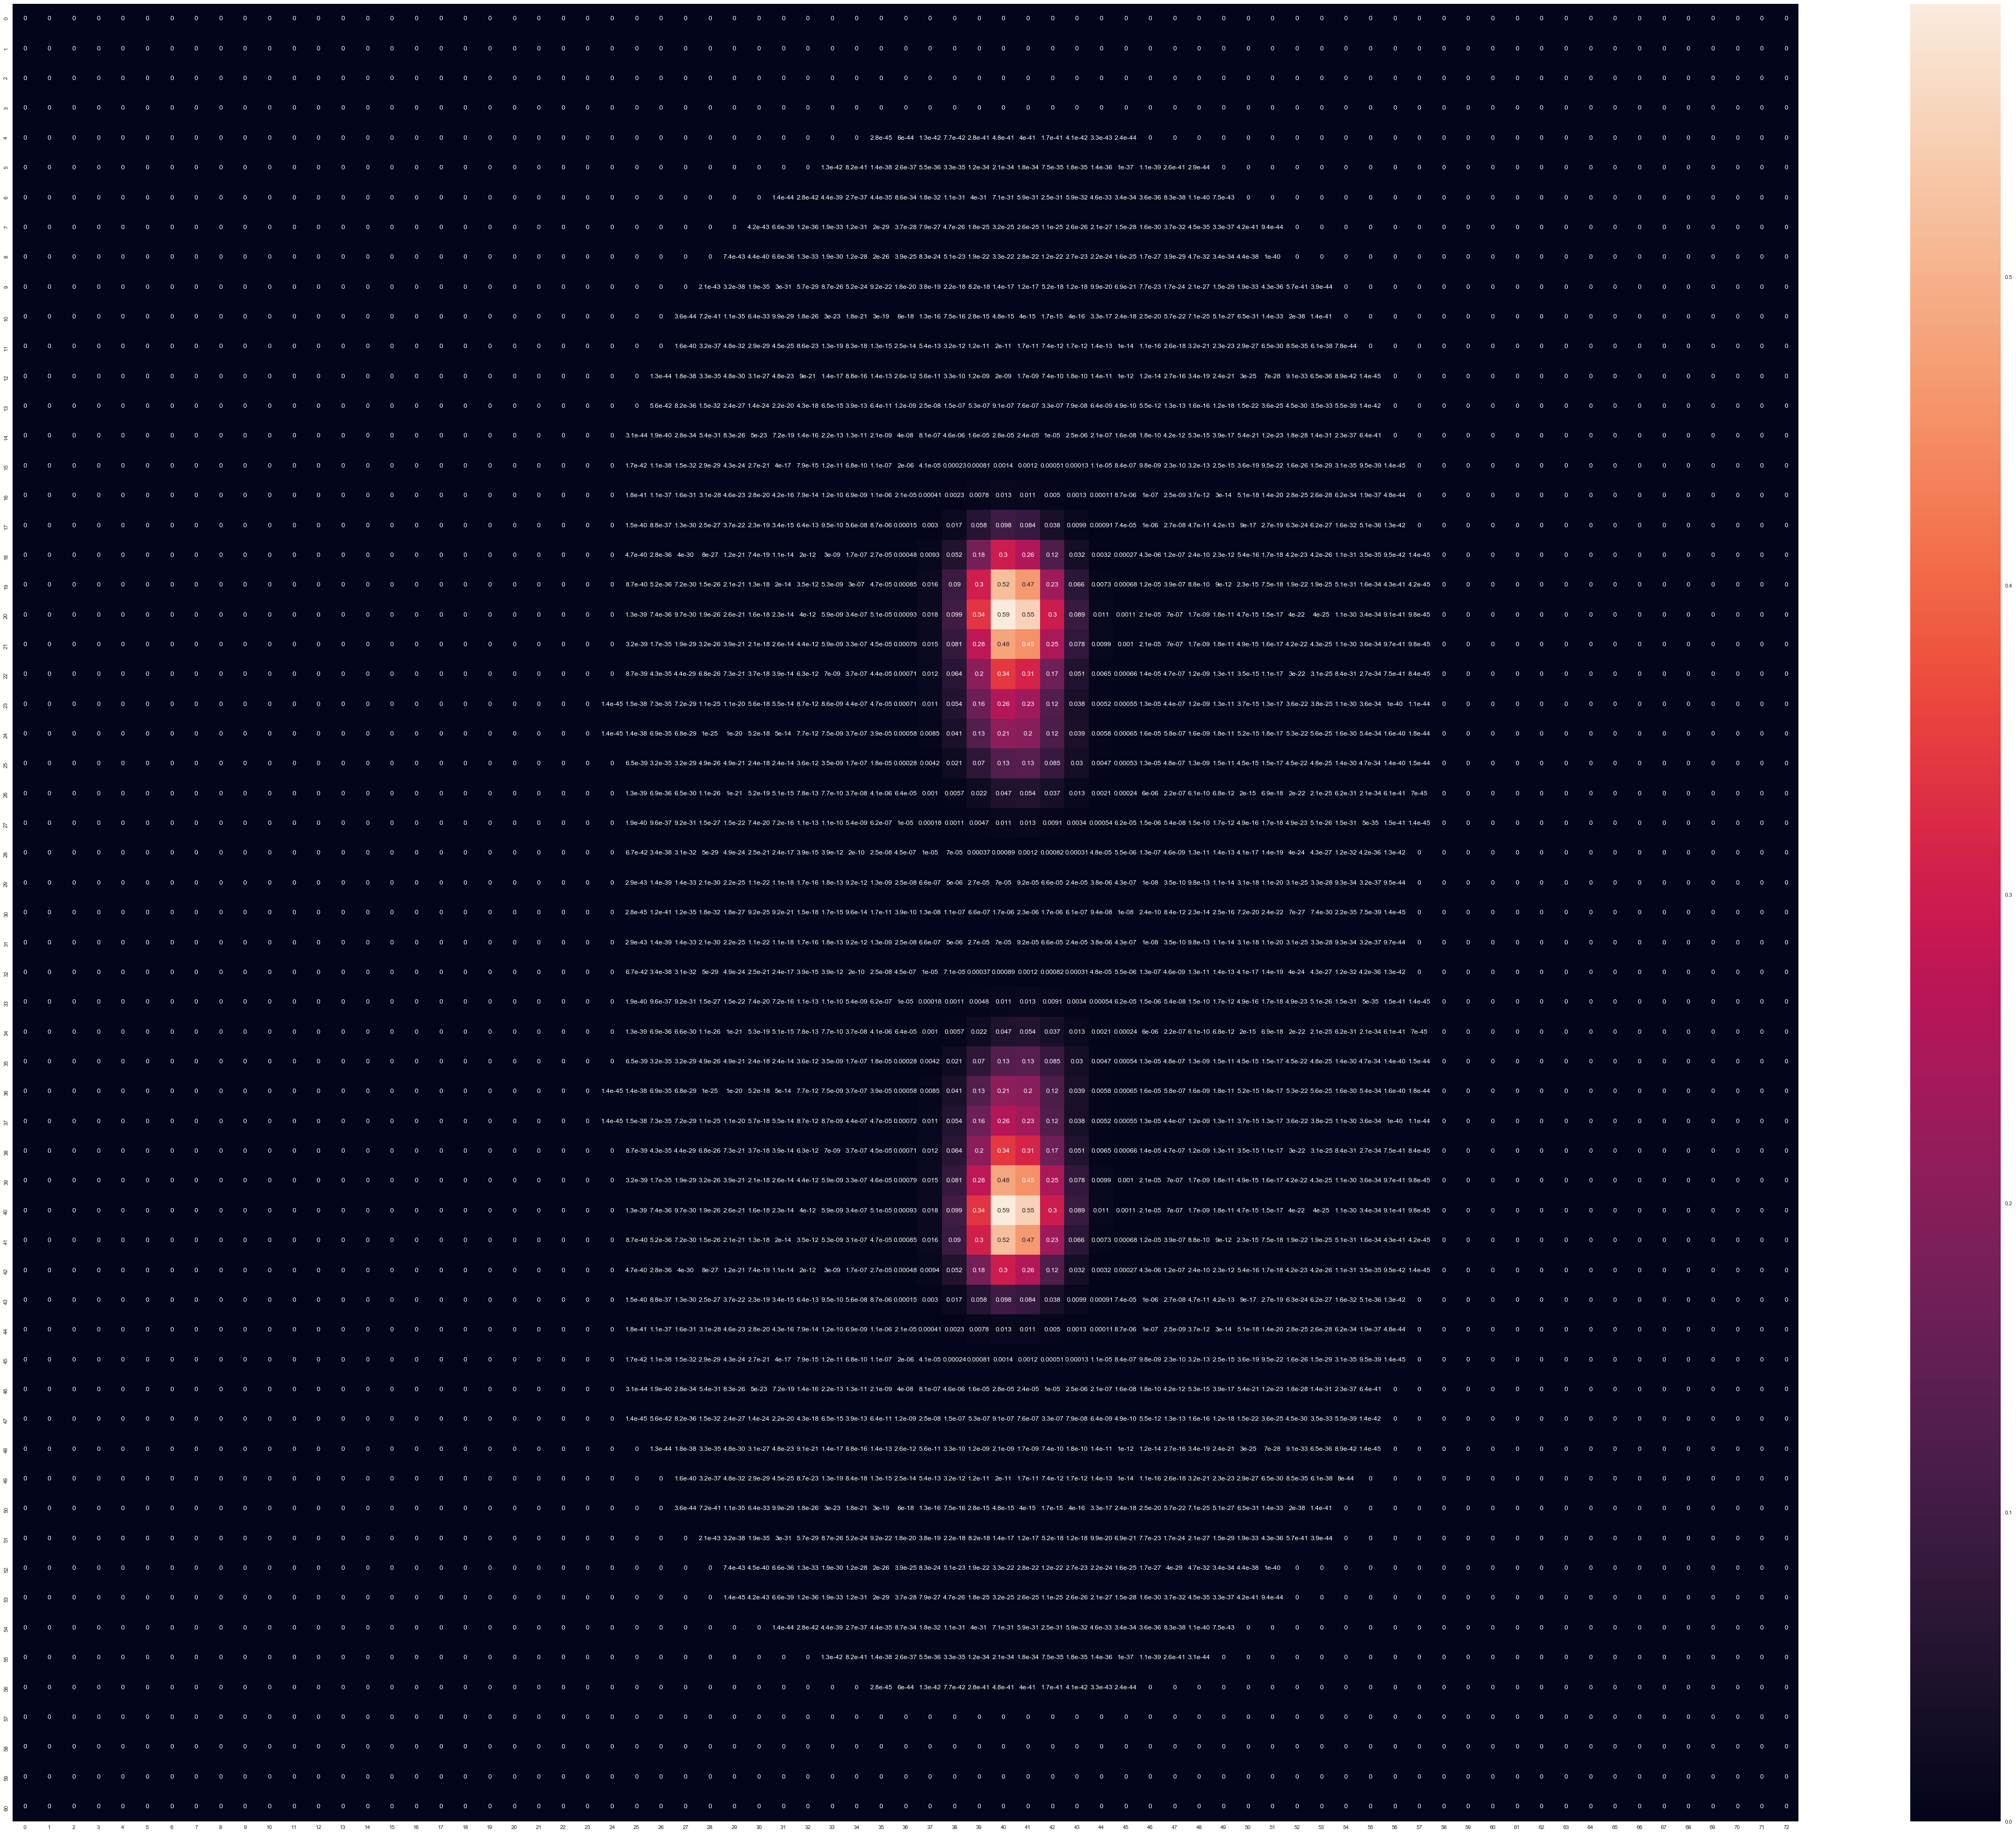

In [5]:
# observe: old mask image data is not binary
a = m_data[:,:,16]
pl.figure(figsize=(73,61))
sns.set()
sns.heatmap(a, annot=True)

In [6]:
pl.close()

# convert to binary array
m_data = (m_data > 0.05).astype(int)

In [7]:
# declare/assign new mask info
m1_fname = 'binary-amygdala-mni-sym_3mm_mask.nii.gz'
m1_img = nib.Nifti1Image(m_data, affine=m_affine, header=m_header)
m1_data = np.array(m1_img.dataobj)
print(m1_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (61, 73, 61)
affine: 
[[   3.    0.    0.  -90.]
 [   0.    3.    0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 61 73 61  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanne

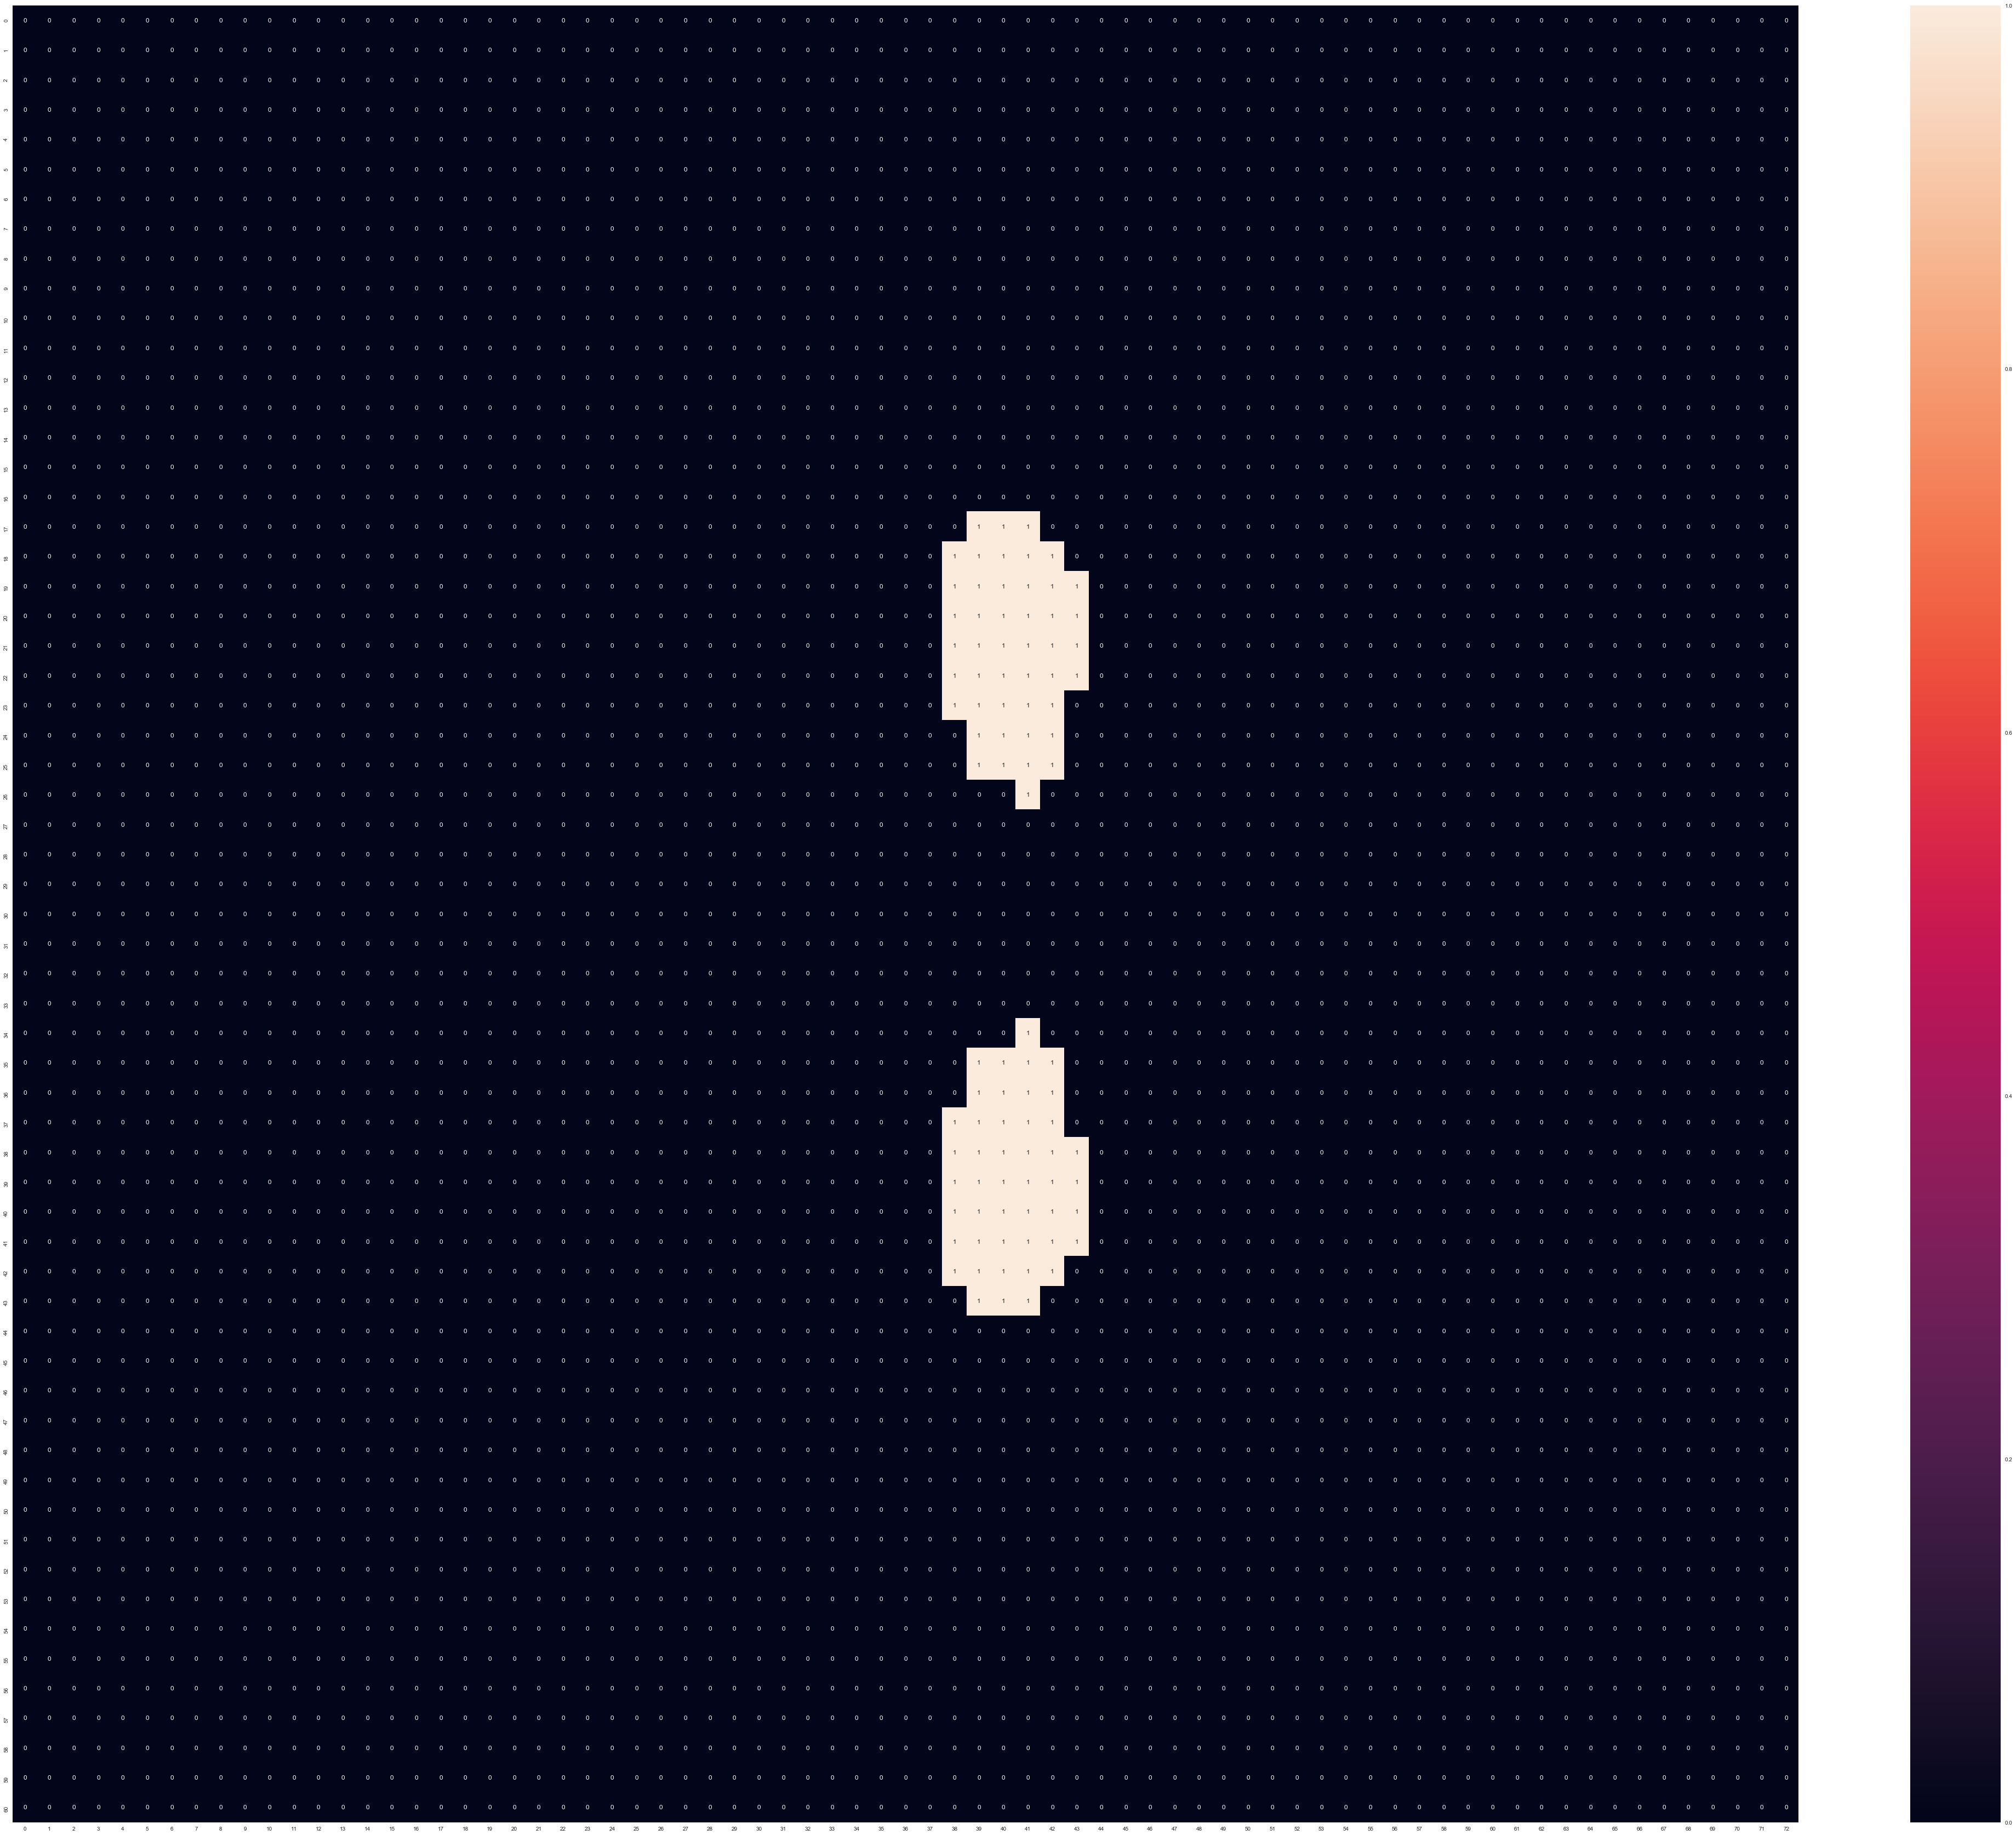

In [8]:
# observe: new mask image data is binary
a = m_data[:,:,16]
pl.figure(figsize=(73,61))
sns.set()
sns.heatmap(a, annot=True)

In [9]:
# save new mask in file
nib.save(m1_img, m1_fname)